# Ghana

## Calculate and visualize average monthly expenditure across Ghana
The data below is from the Ghana - Socioeconomic Panel Survey 2009-2010. It's [available](http://microdata.worldbank.org/index.php/catalog/2534/get_microdata) on the WB Microdata Library.

With household survey data, sample weights are important to generalize from the sample to the population.

- **Objective: Calculate and visualize average food expenditure across Ghana's regions**

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
from shapely.geometry import Point
import pylab as plt
%pylab inline
import seaborn as sns
import mplleaflet as mpll
import osmnx as ox
from IPython.display import Image
import matplotlib.pyplot as plt2

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


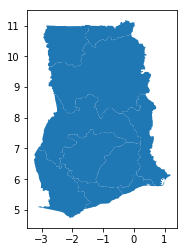

In [110]:
ghana_GADM = gpd.read_file('data/ghana/gadm36_GHA_1.shp')
ghana_GADM.plot()

In [111]:
ghana_GADM.shape

(10, 11)

In [112]:
# List Ghana regions on GADM
ghana_GADM['NAME_1'].value_counts()

Brong Ahafo      1
Volta            1
Western          1
Upper East       1
Ashanti          1
Central          1
Eastern          1
Upper West       1
Northern         1
Greater Accra    1
Name: NAME_1, dtype: int64

In [113]:
df = pd.read_csv('data/ghana/GHA_2009_GSPS_v01_M_STATA8/Consumption Aggregates_STATA8/aggregated_expenditure.csv')

In [114]:
df.head()

,id1,id2,id3,id4,hhno,total_exp_s11b,food_exp,gifts_given,own_produce,children_exp,elderly_exp,maleAdults_exp,femaleAdults_exp,otherItems_exp,fuel_exp,avg_s11_monthly_exp,education_expenditure,health_expenses,dwelling_expenses,avg_monthly_exp_overall
0,Western Region,6.0,1.0,2.0,101001002,0.0,150.850006,0.0,0.0,5.0,0.0,8.333333,9.833333,12.666666,5.0,191.683334,0.0,0.0,21.333334,213.016663
1,Western Region,6.0,1.0,3.0,101001003,0.0,108.949997,0.0,0.0,0.0,0.0,11.666666,9.500000,17.708332,33.0,180.824997,0.0,0.0,0.000000,180.824997
2,Western Region,6.0,1.0,4.0,101001004,0.0,178.000000,0.0,21.0,0.0,0.0,9.916667,0.000000,14.833333,6.5,230.250000,0.0,0.0,0.750000,231.000000
3,Western Region,6.0,1.0,9.0,101001009,0.0,49.799999,0.0,0.0,0.0,0.0,5.708333,10.000000,17.583332,2.0,85.091667,0.0,234.0,1.000000,320.091675
4,Western Region,6.0,1.0,10.0,101001010,0.0,1563.050049,0.0,0.7,0.0,0.0,0.000000,10.666666,17.750000,10.0,1602.166626,0.0,36.0,4.166667,1642.333252


In [115]:
df['id1'].value_counts()

Ashanti Region          895
Eastern Region          642
Greater Accra Region    587
Northern Region         569
Brong Ahafo Region      510
Volta Region            495
Western Region          465
Central Region          420
Upper East Region       240
Upper West Region       180
Name: id1, dtype: int64

In [116]:
df.rename(columns = {'id1':'Region','id2':'District','id3':'EA No',
           'id4':'HH id','total_exp_s11b':'MS_tot_exp', 'avg_s11_monthly_exp':'hh_exp_mo'}, inplace=True)

df.Region.replace({'Ashanti Region':'Ashanti', 'Eastern Region':'Eastern', 'Greater Accra Region':'Greater Accra', 'Northern Region':'Northern', 'Brong Ahafo Region':'Brong Ahafo', 'Volta Region':'Volta', 'Western Region':'Western', 'Central Region':'Central', 'Upper East Region':'Upper East',
       'Upper West Region':'Upper West'}, inplace = True)

In [117]:
df.head()

,Region,District,EA No,HH id,hhno,MS_tot_exp,food_exp,gifts_given,own_produce,children_exp,elderly_exp,maleAdults_exp,femaleAdults_exp,otherItems_exp,fuel_exp,hh_exp_mo,education_expenditure,health_expenses,dwelling_expenses,avg_monthly_exp_overall
0,Western,6.0,1.0,2.0,101001002,0.0,150.850006,0.0,0.0,5.0,0.0,8.333333,9.833333,12.666666,5.0,191.683334,0.0,0.0,21.333334,213.016663
1,Western,6.0,1.0,3.0,101001003,0.0,108.949997,0.0,0.0,0.0,0.0,11.666666,9.500000,17.708332,33.0,180.824997,0.0,0.0,0.000000,180.824997
2,Western,6.0,1.0,4.0,101001004,0.0,178.000000,0.0,21.0,0.0,0.0,9.916667,0.000000,14.833333,6.5,230.250000,0.0,0.0,0.750000,231.000000
3,Western,6.0,1.0,9.0,101001009,0.0,49.799999,0.0,0.0,0.0,0.0,5.708333,10.000000,17.583332,2.0,85.091667,0.0,234.0,1.000000,320.091675
4,Western,6.0,1.0,10.0,101001010,0.0,1563.050049,0.0,0.7,0.0,0.0,0.000000,10.666666,17.750000,10.0,1602.166626,0.0,36.0,4.166667,1642.333252


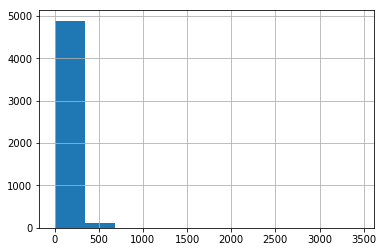

In [118]:
df.food_exp.hist()

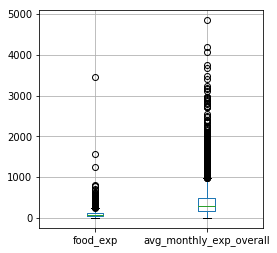

In [119]:
df[['food_exp', 'avg_monthly_exp_overall']].boxplot(figsize = [4,4])

In [120]:
print(df.food_exp.max())
print(df.food_exp.mean())
print(df.avg_monthly_exp_overall.max())
print(df.avg_monthly_exp_overall.mean())

3445.89990234375
102.87327346791274
4847.0
423.6569314838635


In [121]:
# Remove observations more than 3 standard deviations above the mean

df['food_exp'][df['food_exp'] > (df.food_exp.mean()
                                                     + df.food_exp.std() * 3)] = np.nan
df['avg_monthly_exp_overall'][df['avg_monthly_exp_overall'] > (df.avg_monthly_exp_overall.mean() 
                                                         + df.avg_monthly_exp_overall.std() * 3)] = np.nan
df.dropna(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
print(df.food_exp.max())
print(df.food_exp.mean())
print(df.avg_monthly_exp_overall.max())
print(df.avg_monthly_exp_overall.mean())

400.9500122070313
95.44793427839338
1679.5499267578132
373.6875084228619


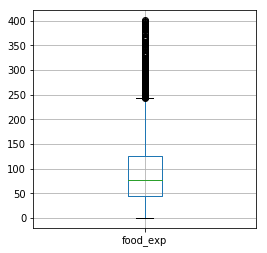

In [123]:
df[['food_exp']].boxplot(figsize = [4,4])

In [124]:
df.groupby(['Region'])['food_exp'].mean()

Region
Ashanti           99.574591
Brong Ahafo       68.586640
Central          102.182902
Eastern           90.878547
Greater Accra    130.918501
Northern          94.294045
Upper East       107.621872
Upper West        64.355923
Volta             73.127947
Western          104.618862
Name: food_exp, dtype: float64

In [125]:
def weighted_mean(values, weights):
    return sum(values * weights) / weights.sum()

In [126]:
means_table_df = df.groupby('Region').mean()[['food_exp']] # returns a data frame
means_table = pd.Series({Region: weighted_mean(df.food_exp[df.Region == Region],
                                  df.hhno[df.Region == Region]) for Region in df.Region.unique()},
                                name = 'mean_food_exp')

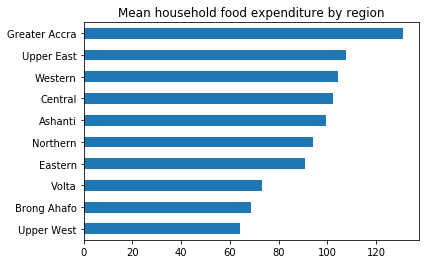

In [127]:
means_table.sort_values(ascending = True).plot(kind='barh')
plt.title('Mean household food expenditure by region');

#### 4. Visualize on a map of Ghana
* A good data source is GADM, which has admin boundaries for all countries at levels 0 through 3 (national boundaries through to ward level). https://gadm.org/


* GADM1 gives us Ghana's 10 regions. Our dataset uses the same 

In [128]:
means_table

Western          104.618161
Central          102.182534
Greater Accra    130.919955
Volta             73.124894
Eastern           90.882314
Ashanti           99.573655
Brong Ahafo       68.586961
Northern          94.294814
Upper East       107.620941
Upper West        64.355855
Name: mean_food_exp, dtype: float64

In [129]:
Ashanti = ['Ashanti']
Brong_Ahafo = ['Brong Ahafo']
Central = ['Central']
Greater_Accra = ['Greater Accra']
Northern = ['Northern']
Upper_East = ['Upper East']
Upper_West = ['Upper West']
Western = ['Western']
Eastern = ['Eastern']
Volta = ['Volta']

def remap_states(state):
    if state in Ashanti:
        return('Ashanti')
    elif state in Brong_Ahafo:
        return('Brong Ahafo')
    elif state in Central:
        return('Central')
    elif state in Greater_Accra:
        return('Greater Accra')
    elif state in Northern:
        return('Northern')
    elif state in Upper_East:
        return('Upper East')
    elif state in Upper_West:
        return('Upper West')
    elif state in Western:
        return('Western')
    elif state in Eastern:
        return('Eastern')
    elif state in Volta:
        return('Volta')
    else:
        return('error!')

In [130]:
ghana_GADM['Region'] = ghana_GADM.NAME_1.apply(remap_states)

In [131]:
# Create a new geodataframe comprising 10 merged polygons

regions = ghana_GADM.dissolve(by = 'Region')

In [132]:
regions.head(10)
regions.shape
means_table.shape

(10,)

In [133]:
regions_merged = pd.merge(regions, means_table, left_index=True, right_index=True)

In [134]:
regions_merged = gpd.GeoDataFrame(regions_merged)

In [135]:
regions_merged.head(10)

,geometry,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,mean_food_exp
Ashanti,"POLYGON ((-1.54144502 5.93492079, -1.55517495 ...",GHA,Ghana,GHA.1_1,Ashanti,None,None,Region,Region,None,GH.AH,99.573655
Brong Ahafo,"POLYGON ((-1.32043099 7.59765482, -1.33174598 ...",GHA,Ghana,GHA.2_1,Brong Ahafo,None,None,Region,Region,None,GH.BA,68.586961
Central,"(POLYGON ((-0.65097302 5.32708216, -0.65208298...",GHA,Ghana,GHA.3_1,Central,None,None,Region,Region,None,GH.CP,102.182534
Eastern,"POLYGON ((-0.15025599 5.76964903, -0.164995 5....",GHA,Ghana,GHA.4_1,Eastern,None,None,Region,Region,None,GH.EP,90.882314
Greater Accra,"(POLYGON ((0.43625 5.83874989, 0.43625 5.83819...",GHA,Ghana,GHA.5_1,Greater Accra,None,None,Region,Region,None,GH.AA,130.919955
Northern,"POLYGON ((-1.93357694 8.208468440000001, -1.94...",GHA,Ghana,GHA.6_1,Northern,None,None,Region,Region,None,GH.NP,94.294814
Upper East,"POLYGON ((-1.49338496 10.44206047, -1.49012804...",GHA,Ghana,GHA.7_1,Upper East,None,None,Region,Region,None,GH.UE,107.620941
Upper West,"POLYGON ((-2.79028821 10.1286993, -2.79017377 ...",GHA,Ghana,GHA.8_1,Upper West,None,None,Region,Region,None,GH.UW,64.355855
Volta,"(POLYGON ((0.9270840299999999 6.00625086, 0.92...",GHA,Ghana,GHA.9_1,Volta,None,None,Region,Region,None,GH.TV,73.124894
Western,"(POLYGON ((-1.73680604 4.88764, -1.73680604 4....",GHA,Ghana,GHA.10_1,Western,None,None,Region,Region,None,GH.WP,104.618161


In [ ]:
regions_merged.plot(column = 'mean_food_exp', legend = True, figsize = [20,20])
plt.title('Average household food expenditure - Ghana', fontdict={'fontsize': 15});
plt.xticks([])
plt.yticks([])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


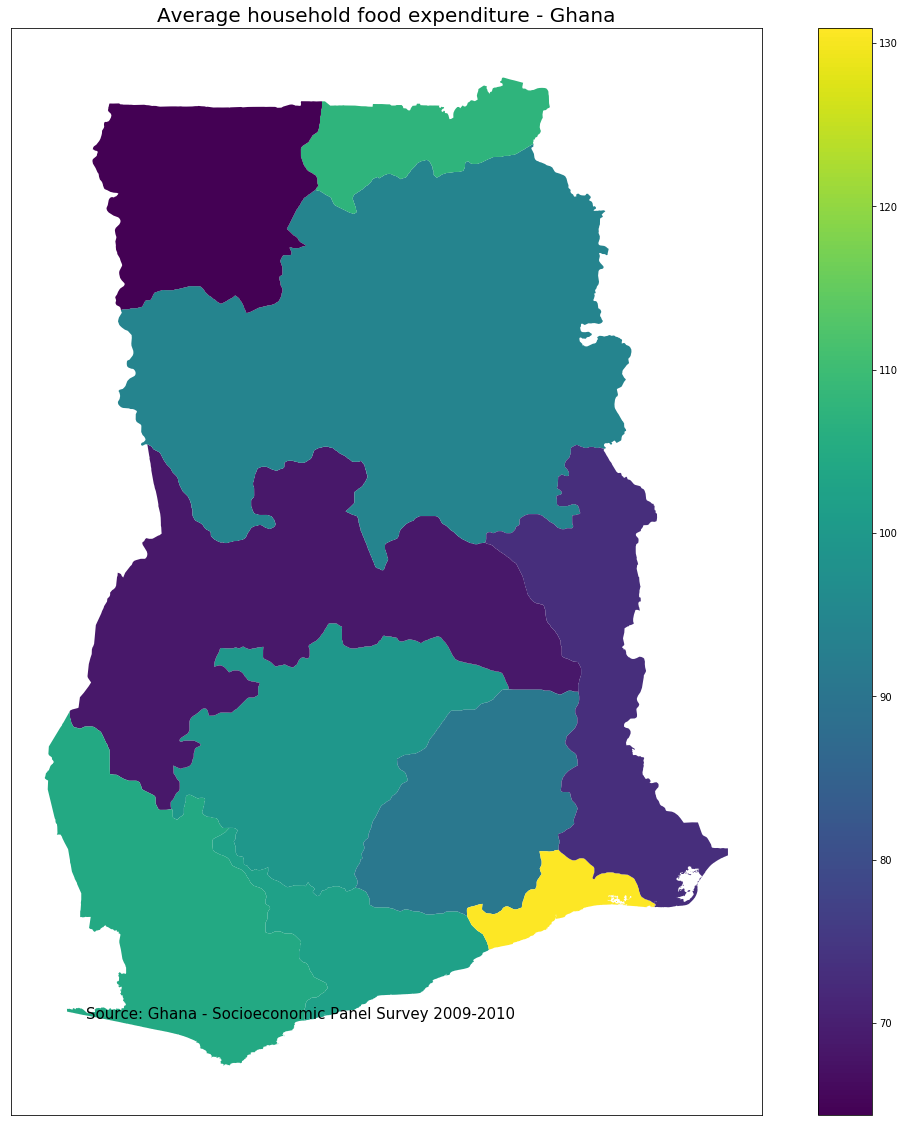

In [143]:
regions_merged.plot(column = 'mean_food_exp', legend = True, figsize = [20,20])
plt2.title('Average household food expenditure - Ghana', fontdict={'fontsize': 20});
plt2.xticks([])
plt2.yticks([])
plt2.annotate('Source: Ghana - Socioeconomic Panel Survey 2009-2010', xy=(0.1, 0.1), size=15, xycoords='axes fraction', textcoords='offset points', va='top')
plt2.gca().axes.get_yaxis().set_visible(False)
plt2.show()